# Project 1. Victory speeches at 10 Downing Street

Over the last 30 years it has become tradition that the leader of the winning party in the British elections addresses the country from outside their future office at 10 Downing Street.

The present project analyses a collection of these short speeches, from 1979 to date, with the aim of creating an interactive data visualization that quickly conveys the similarities and differences of the contents of those addresses by party, year, candidate, etc.

From the technical point of view, the goal was to work with a small collection of text to test data processing techniques. 

In this case the sample contains around 12 speeches that could have been read one by one by a human reporter, but this way we were able to go back to the text and make sure that the calculations in our analysis were rendering the correct results.   

![](https://s19.postimg.org/wxqpssrj7/British_PMs.jpg)


**Type of text analysed**: Political speeches                 
**Text data description**: +9700 words/12 text files             
**Type of project by data size**: Small                      
**Data collection**: Manual search 

## (1) Collecting the data
We collected the speeches one by one, using Google search and [this list](https://en.wikipedia.org/wiki/List_of_Prime_Ministers_of_the_United_Kingdom) from Wikipedia as a reference for the dates of elections and re-elections of PMs, their political affiliations, etc.

We gave priority to transcripts available at the UK Government website, and only used other sources when the speeches were not available from this official source.

Most of the speeches could be retrieved easily, with the exception of the first few ones by Mrs. Thatcher. Instead of official speeches, what survives from those years are transcripts of her exchanges with the press in individual interviews at 10 Downing Street or statements outside the office - from which we infer it was not an offical custom at the time yet. 



### List of speeches/sources

2016 - Theresa May - Taken from the [UK Goverment website](https://www.gov.uk/government/speeches/statement-from-the-new-prime-minister-theresa-may)

2015 - David Cameron - Taken from the [UK Goverment website](https://www.gov.uk/government/speeches/election-2015-prime-ministers-speech)

2010 - David Cameron - Taken from the [Telegraph](http://www.telegraph.co.uk/news/politics/david-cameron/7712954/David-Camerons-speech-full-text.html)

2007 - Gordon Brown - Taken from the [Telegraph](http://www.telegraph.co.uk/news/uknews/1555770/Gordon-Browns-first-speech-as-Prime-Minister.html)

2005 - Tony Blair - Taken from the [BBC](http://news.bbc.co.uk/1/hi/uk_politics/vote_2005/frontpage/4522185.stm)

2001 - Tony Blair - Taken from the [Guardian](http://www.theguardian.com/politics/2001/jun/08/election2001.electionspast1)

1997 - Tony Blair - Taken from [CNN](http://edition.cnn.com/WORLD/9705/02/blair.speech)

1992 - John Major - Taken from [Major's official website](http://www.johnmajor.co.uk/page1019.html)

1990 - John Major - Taken from [Major's official website](http://johnmajor.co.uk/0003.html)

1987 - Margaret Thatcher - Taken from the following links in Thatcher's official website: [Remarks returning to No.10 ("work")](http://www.margaretthatcher.org/document/106890), [Remarks to the crowd in Downing Street](http://www.margaretthatcher.org/document/106891), [Radio Interview for IRN (General Election victory)](http://www.margaretthatcher.org/document/106893).

1983 - Margaret Thatcher - Taken from the following links in Thatcher's official website: [Speech on being re-elected MP for Finchley](http://www.margaretthatcher.org/document/105393), [TV Interview for BBC (re-elected MP for Finchley)](http://www.margaretthatcher.org/document/105174), [Remarks returning to Conservative Central Office](http://www.margaretthatcher.org/document/105175),
[TV Interview for BBC (post-election reshuffle)](http://www.margaretthatcher.org/document/105176),
[TV Interview for ITN (post-election reshuffle)](http://www.margaretthatcher.org/document/105394),
[Radio Interview for IRN (post-election reshuffle)](http://www.margaretthatcher.org/document/105395),
[Remarks thanking staff at Conservative Central Office](http://www.margaretthatcher.org/document/105396),
[Remarks to crowds in Downing Street (re-election)](http://www.margaretthatcher.org/document/105397) - all statements made on June 10 (victory day).

1979 - Margaret Thatcher - Taken from the following links in Thatcher's official website: [Remarks on becoming Prime Minister (St Francis's prayer)](http://www.margaretthatcher.org/speeches/displaydocument.asp?docid=104078)



## (2) Preparing the data

### Analysing text data as a corpus

One of the underlying technical goals for this project was to create and work with a corpus to analyse the data. In NLTK there are methods that cannot be applied to all kinds of objects, and we wanted to used methods that only work with text corpora.

With that goal in mind, the speeches were copied from the abovementioned sources, pasted into independent text files (.txt) encoded as UTF-8, and placed into the same folder. The convention we used to name the files was `Year[espace]LastNameofPM.txt`

![](https://s19.postimg.org/fp79xlkrn/victory_speeches_directory.jpg)                            

### 1.1.- Creating a corpus from local files

The procedure to create a corpus based on local files is detailed in [chapter 2](http://www.nltk.org/book/ch02.html) of *Natural Language Processing with Python* (Bird, Steven, Edward Loper and Ewan Klein, 2009). 

We used NLTK's PlaintextCorpusReader, which as its name indicates, is used to "access corpora that  that consist of unprocessed plaintext data." (NLTK 3.0 Documentation, 2015)  and save it in the variable *victorySpeeches* by indicating the path to the files and the types of files to be loaded.

In [26]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = "/users/admin/desktop/British PM Victory Speeches"

# The second argument can be modified depending on the types of files to be included in the corpus
# In this case we are including all the files in the directory, but other specifications can be made, like ".txt" if we
# only wanted to include files with that extension
victorySpeeches = PlaintextCorpusReader(corpus_root, ".*")

# Now we can see the file ids using the following method:
victorySpeeches.fileids()

['1979 Thatcher.txt',
 '1983 Thatcher.txt',
 '1987 Thatcher.txt',
 '1990 Major.txt',
 '1992 Major.txt',
 '1997 Blair.txt',
 '2001 Blair.txt',
 '2005 Blair.txt',
 '2007 Brown.txt',
 '2010 Cameron.txt',
 '2015 Cameron.txt',
 '2016 May.txt']

One of the important steps in data cleaning that we found in text-data driven projects reviewed for this research (see Walker, 2016 A and B), as well as in the documentation, is the convenience of changing all the text into lower case. The analysis performed by these tools is case sensitive and will affect the word count of the same word in its capitalised and non-capitalised version.

But given that we may also need to use the capitalisation as a way to identify proper names of places or people, just to quote an example, it is convenient to designate two variables to store both versions of the text.


## (3) Exploring the data
File ids can be used to get information specific to each of the files (or combinations thereof) in the collection.

For instance, we can process count the number of words in Mrs. May's speech:

In [27]:
# We first break down the text into words...
mayWC = victorySpeeches.words('2016 May.txt')

# ...and then count them.
len(mayWC)

776

We can also do the count for all the files and put it in one place to get a comparative perspective.

In [28]:
print("Words  Speech")
for fileid in victorySpeeches.fileids():
    num_words = len(victorySpeeches.words(fileid))
    num_vocab = len(set(w.lower() for w in victorySpeeches.words(fileid)))
    print(num_words, "-", fileid)

Words  Speech
458 - 1979 Thatcher.txt
1620 - 1983 Thatcher.txt
1124 - 1987 Thatcher.txt
553 - 1990 Major.txt
673 - 1992 Major.txt
617 - 1997 Blair.txt
939 - 2001 Blair.txt
1091 - 2005 Blair.txt
382 - 2007 Brown.txt
707 - 2010 Cameron.txt
770 - 2015 Cameron.txt
776 - 2016 May.txt


And we can also use the following formula to calculate the total word count:

In [29]:
len(victorySpeeches.words())

9710

### 3.1. Averages

We can calculate the **average length** of these addresses:

In [30]:
# len(victorySpeeches.words()) is the total number of words in the collection
# len(victorySpeeches.fileids()) is the total number of items/speeches
averageLength = len(victorySpeeches.words())/len(victorySpeeches.fileids())
print(round(averageLength))

809


But given that Mrs. Thatcher statements, as described above, were not made in the form of public addresses like those of her counterparts, we should also do the math excluding her numbers.

### Excluding items from the list

We can use the regular expressions module (`re`) to target only the file names that include the word "Thatcher". Note that although some of these calculations can be simplified using nested functions we have preferred to assign some of them to variables to make the code more legible. The same goes for some of the print calls that have been included to visualise the results, rather than because they are necessary.

In [31]:
import re
thatcherFileName = re.compile("\w+\s\Thatcher.txt")
exclude = thatcherFileName.findall(str(victorySpeeches.fileids()))
print(exclude)

['1979 Thatcher.txt', '1983 Thatcher.txt', '1987 Thatcher.txt']


In [32]:
listOfSpeeches = victorySpeeches.fileids()
excludingThatcher = [fileid for fileid in listOfSpeeches if fileid not in exclude]
print(excludingThatcher)
# This is the forum entry used as a reference to find how to exclude elements from a list
# http://stackoverflow.com/questions/2793324/is-there-a-simple-way-to-delete-a-list-element-by-value-in-python

['1990 Major.txt', '1992 Major.txt', '1997 Blair.txt', '2001 Blair.txt', '2005 Blair.txt', '2007 Brown.txt', '2010 Cameron.txt', '2015 Cameron.txt', '2016 May.txt']


Now we can use the new list to get a better idea of the average length of speeches as we wanted.

When we tried to simply apply the same methods that we used above to our new list, we got an error because this list is not recognized by the program as a corpus. So we need to use PlainCorpusReader as before:

In [33]:
allSpeechesButThatchers = PlaintextCorpusReader(corpus_root, excludingThatcher)
allSpeechesButThatchers.fileids()

['1990 Major.txt',
 '1992 Major.txt',
 '1997 Blair.txt',
 '2001 Blair.txt',
 '2005 Blair.txt',
 '2007 Brown.txt',
 '2010 Cameron.txt',
 '2015 Cameron.txt',
 '2016 May.txt']

The average word count for these would be:

In [34]:
round(len(allSpeechesButThatchers.words())/len(allSpeechesButThatchers.fileids()))

723

We can see that Thatcher's statements were skewing the results by some 100 words.

Let's redo the word count again for this reduced sample:

In [35]:
print("Words  Speech")
for fileid in allSpeechesButThatchers.fileids():
    num_words = len(allSpeechesButThatchers.words(fileid))
    print(num_words, "-", fileid)

Words  Speech
553 - 1990 Major.txt
673 - 1992 Major.txt
617 - 1997 Blair.txt
939 - 2001 Blair.txt
1091 - 2005 Blair.txt
382 - 2007 Brown.txt
707 - 2010 Cameron.txt
770 - 2015 Cameron.txt
776 - 2016 May.txt


### 3.2 Maximums and minimums: Sorting the data

Now that we have a set of similar elements it makes more sense to explore the extremes (maximums and minimums) in our list.

The list above has been created just by printing the results of the iteration through the elements in `allSpeechesButThatchers`, but it does not constitute an ordered set of elements that we can easily sort.

To do that, we decided to include the elements in a list, as follows:

In [36]:
print("Words  Speech")
unorderedlist = []
for fileid in allSpeechesButThatchers.fileids():
    num_words = len(allSpeechesButThatchers.words(fileid))
    # The following line appends a pair of elements to the list, as a matrix, to make sure that both elements, the
    # word count and the name of the file, are linked to each other
    # See 5.1.4. Nested List Comprehensions, in Data Structures for Python 3.5.2
    # https://docs.python.org/3/tutorial/datastructures.html
    unorderedlist.append([num_words, fileid])
sorted(unorderedlist)

newlist = sorted(unorderedlist)

for num_words in newlist:
    print(num_words)

Words  Speech
[382, '2007 Brown.txt']
[553, '1990 Major.txt']
[617, '1997 Blair.txt']
[673, '1992 Major.txt']
[707, '2010 Cameron.txt']
[770, '2015 Cameron.txt']
[776, '2016 May.txt']
[939, '2001 Blair.txt']
[1091, '2005 Blair.txt']


We can see that the shortest speech was the one made by Gordon Brown in 2007, while the longest was Blair's in 2005.

Another trend that can be observed is how **re-election speeches are always longer than the previous one**: Cameron's re-election speech (2015) was some 60 words longer than the one he made in his first election in 2010; the same for Major's speeches in 1990 and 1992; and Blair kept extending his from 600 words to 900, and then to almost 1,100.

## (4) Content analysis

Although from a methodological perspective it is important not to lose sight that the sample selected for this project is very limited, and cannot therefore be used to say anything about the PMs or their parties beyond describing these inaugural ceremonies, there are a few elements that could be of relevance for a journalistic piece.

We could, for instance analyse the following:

1. Main topics mentioned
2. Promises made and plans for the future
3. Problems/challenges mentioned
4. Who did the elected PM thank (if anyone)
5. Mentions of the opposing parties/candidates
6. What did they say about the country/the people

These are general features based on the type of document we are faced with here, but others could emerge after a preliminary exploration.

### 4.1. Finding clues

Some of the elements above can be explored using the following methods:

- A term frequency analysis could help to find common topics (1) and issues (3)

- Searching for specific target words:

    - markers of future tense formulations (*will, going to*) could be associated to promises, future plans (2)
    - target words associated to the expression of gratitude (4) (*thank, grateful, gratitude*, etc.)
    - search for specific party names (5)
    - search for words connected to the concept of nation (British, Britain, UK, people, etc.) (6)
    
The word tally per PM could also help to detect distinctive characteristics that could be included in our final comparative visualisation - although the most important would be to find categories where parallelisms can be shown across different PMs.

### 4.1.2 Frequently used words

We can start then tallying the words used in each speech.

The following piece of script will turn the words contained in each file into a list of words contained in the variables we have created here:

In [51]:
from nltk import word_tokenize

may2016 = nltk.Text(victorySpeeches.words('2016 May.txt'))
cameron2015 = nltk.Text(victorySpeeches.words('2015 Cameron.txt'))
cameron2010 = nltk.Text(victorySpeeches.words('2010 Cameron.txt'))
brown2007 = nltk.Text(victorySpeeches.words('2007 Brown.txt'))
blair2005 = nltk.Text(victorySpeeches.words('2005 Blair.txt'))
blair2001 = nltk.Text(victorySpeeches.words('2001 Blair.txt'))
blair1997 = nltk.Text(victorySpeeches.words('1997 Blair.txt'))
major1990 = nltk.Text(victorySpeeches.words('1990 Major.txt'))
major1992 = nltk.Text(victorySpeeches.words('1992 Major.txt'))
thatcher1987 = nltk.Text(victorySpeeches.words('1987 Thatcher.txt'))
thatcher1983 = nltk.Text(victorySpeeches.words('1983 Thatcher.txt'))
thatcher1979 = nltk.Text(victorySpeeches.words('1979 Thatcher.txt'))

For the wordcount, we will use the following functions:

In [52]:
# First we clean the text transforming it to lower case and removing stop words and punctuation  
# Code adapted from example at 
# https://github.com/DistrictDataLabs/intro-to-nltk/blob/master/exercises/classification/products.py
from nltk import *
import string

def normalize_words(speech):
    stopwords  = set(nltk.corpus.stopwords.words('english'))
    lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
    for token in speech:
        token = token.lower()
        if token in string.punctuation: continue
        if token in stopwords: continue
        yield lemmatizer.lemmatize(token)
        
# And then we use the following function to count the words
# Code adapted from a post by a forum contributor in StackOverflow: 
# http://stackoverflow.com/questions/21107505/python-word-count-from-a-txt-file-program

def wordcount(speech):
    wordcount={}
    cleanText = normalize_words(speech)
    for word in cleanText:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
    for k,v in wordcount.items():
        if v > 3:
            print(k, v)

# We did a test and 2 repetitions were too common, so we decided we only wanted words that had been used
# 3 or more times ( v > 2 )

**Most common words in May's speech**

In [53]:
wordcount(may2016)

’ 29
britain 5
know 5
government 5
one 4
mean 5
david 4


**Most common words in Cameron's speech**

In [54]:
wordcount(cameron2015)

scotland 4
future 5
indeed 4
life 4
nation 4
’ 8
country 7
government 10
make 4
people 7
united 5
chance 4
year 4
mean 7
kingdom 5


**Most common words in Cameron's speech**

In [55]:
wordcount(cameron2010)

work 5
believe 5
value 5
together 5
responsibility 4
government 11
one 4
political 4
country 9
want 6
need 6
difficult 4


**Most common words in Blair's speech**

In [56]:
wordcount(blair2005)

learnt 4
today 4
issue 7
third 4
many 7
work 6
first 4
like 5
public 4
well 4
know 8
service 4
government 7
focus 7
u 7
also 6
family 4
people 23
value 4
priority 5
want 13
investment 4
believe 5


**Most common words in Blair's speech**

In [57]:
wordcount(blair2001)

future 4
clearly 4
system 5
believe 4
must 4
country 5
need 10
change 9
work 4
make 4
people 7


**Most common words in Blair's speech**

In [58]:
wordcount(blair1997)

today 5
value 5
country 6
new 10
labour 8
government 11
one 4
people 6
-- 7
mandate 4


**Most common words in Major's speech**

In [59]:
wordcount(major1990)

hope 5
party 5
country 6
year 8


**Most common words in Thatcher's speech**

In [60]:
wordcount(thatcher1987)

look 4
work 4
inner 5
get 7
city 6
go 5
got 6
well 4
know 8
hope 4
one 5
course 4
manifesto 5
people 14
shall 4
— 5
legislation 4
militant 4
would 4
money 4
way 8


**Most common words in Thatcher's speech**

In [61]:
wordcount(thatcher1983)

much 6
system 8
election 5
cabinet 4
get 5
must 5
well 4
got 4
party 9
clear 7
quite 6
change 6
know 5
labour 6
victory 4
government 11
fragmentation 4
given 4
hope 4
one 6
last 4
make 4
bill 6
course 5
manifesto 4
session 4
people 14
difficult 4
always 4
time 8
thank 9
thing 7
decisive 5
... 8
mean 4
another 6
put 6
coming 4
first 5
think 9


**Most common words in Thatcher's speech**

In [62]:
wordcount(thatcher1979)

bring 5
believe 4
thing 7
well 4
… 6
may 7


We can also use the victorySpeech corpus to find the most common words in all the speeches combined: 

In [63]:
from nltk.corpus import stopwords
# We first use a list comprehension to eliminate all the stop words from our corpus:
speechesWithoutStopwords = [word for word in victorySpeeches.words() if word not in stopwords.words('english')]
speechesWithoutStopwords2 = [word for word in speechesWithoutStopwords if word not in string.punctuation]

# And then use the FreqDist function and the most_common() method to get the most common occurrences (50 in this case) 
FreqDist(speechesWithoutStopwords2).most_common(50)

[('I', 229),
 ('people', 92),
 ('government', 53),
 ('country', 51),
 ('’', 43),
 ('And', 40),
 ('We', 32),
 ('want', 31),
 ('It', 29),
 ('believe', 29),
 ('one', 27),
 ('know', 27),
 ('work', 27),
 ('make', 26),
 ('new', 25),
 ('us', 24),
 ('years', 23),
 ('change', 22),
 ('get', 20),
 ('think', 19),
 ('But', 19),
 ('system', 19),
 ('way', 18),
 ('build', 18),
 ('need', 18),
 ('future', 17),
 ('That', 17),
 ('Britain', 17),
 ('course', 17),
 ('also', 16),
 ('must', 16),
 ('means', 16),
 ('well', 16),
 ('hope', 16),
 ('Labour', 15),
 ('things', 15),
 ('much', 15),
 ('life', 15),
 ('first', 14),
 ('values', 14),
 ('election', 14),
 ('shall', 14),
 ('bring', 14),
 ('say', 14),
 ('clear', 13),
 ('time', 13),
 ('opportunity', 13),
 ('The', 13),
 ('form', 12),
 ('world', 12)]

### Common bigrams

We can also explore common word pairs or combinations, using the collocations method to find collocations in the texts, which are defined as "frequent bigrams," that are more common than the individual occurrences of the individual terms (NLTK 3.0 Documentation 2015).

Concepts for collocations outside the NLTK framework include “an arbitrary and recurrent word combination” (Benson 1990 cited by Indurkhya and Damerau 2010), and also "a statistically idiomatic MWE (esp. of high frequency) (...) often distinguished from “idioms” or “non-compositional phrases” on the grounds that they are not syntactically idiomatic (Indurkhya and Damerau 2010).

We can easily find the collocations for each speech using a comprehensive list:

In [77]:
# We create this list containing all the speeches
speech = [may2016, cameron2015, cameron2010, brown2007, blair2005, blair2001, blair1997, major1992, major1990, thatcher1987, thatcher1983, thatcher1979]

# and then we apply the collocations method to each of its items:
collocations = [items.collocations() for items in speech]


less likely; David Cameron; every one; make Britain
United Kingdom; different nations; public service; better future;
means giving; majority government
difficult decisions; political system; public service; country needs;
new government
British people
public services; third term; divisive issue; British people; people
want; also learnt; also know; many people
would like; criminal justice; four years; laid foundations; justice
system
Labour Government; New Labour; new Labour
Downing Street; General Election; Health Service; National Health;
make sure
Conservative Party; years ago
inner cities; Prime Minister; front door; increasing number
new look; last session; Prime Minister; start afresh; Labour Party;
extreme left; world recession; weak government; given clear; keep
people; first time
British people


This method was fast, but it's hard to identify which speech is which as we advance through the list. It would be convenient to print the file id by each collocation, but unfortunately Python does not provide an easy way to do this.

For the purpose of clarity we could break down this into independent calculations:

In [78]:
may2016.collocations()

less likely; David Cameron; every one; make Britain


In [79]:
cameron2015.collocations()

United Kingdom; different nations; public service; better future;
means giving; majority government


In [80]:
cameron2010.collocations()

difficult decisions; political system; public service; country needs;
new government


In [68]:
brown2007.collocations()

British people


In [69]:
blair2005.collocations()

public services; third term; divisive issue; British people; people
want; also learnt; also know; many people


In [70]:
blair2001.collocations()

would like; criminal justice; four years; laid foundations; justice
system


In [71]:
blair1997.collocations()

Labour Government; New Labour; new Labour


In [72]:
major1992.collocations()

Downing Street; General Election; Health Service; National Health;
make sure


In [73]:
major1990.collocations()

Conservative Party; years ago


In [74]:
thatcher1987.collocations()

inner cities; Prime Minister; front door; increasing number


In [75]:
thatcher1983.collocations()

new look; last session; Prime Minister; start afresh; Labour Party;
extreme left; world recession; weak government; given clear; keep
people; first time


In [76]:
thatcher1979.collocations()

British people


### 4.1.3. Finding promises

There are a series of cues that can be used to find certain types of content in our texts. In the cases of the promises that made it to the inaugural speeches we can start trying grammatical markers for the future tense, such as *going to, will, future*, etc.

The `concordance` method (which only takes one argument at the time) will help us quickly visualise them all in one place:

In [81]:
may2016.concordance("will")

Displaying 11 of 11 matches:
e that , if you ’ re born poor , you will die on average 9 years earlier than 
rivately . If you ’ re a woman , you will earn less than a man . If you suffer
e a struggle . The government I lead will be driven not by the interests of th
e privileged few , but by yours . We will do everything we can to give you mor
advantages of the fortunate few . We will do everything we can to help anybody
round , to go as far as your talents will take you . We are living through an 
ause we ’ re Great Britain , that we will rise to the challenge . As we leave 
 As we leave the European Union , we will forge a bold new positive role for o
 for ourselves in the world , and we will make Britain a country that works no
few , but for every one of us . That will be the mission of the government I l
 government I lead , and together we will build a better Britain .


In [97]:
may2016.concordance("going")

No matches


In [98]:
may2016.concordance("future")

No matches


In [99]:
may2016.concordance("promise")

No matches


In [100]:
may2016.concordance("determined")

No matches


In [101]:
may2016.concordance("hope")

No matches


A fast way to evaluate several terms for different speeches would be to use a function:

In [87]:
def futureMarkers(speech):
    print("Matches for WILL")
    speech.concordance("will")
    print("")
    print("Matches for GOING")
    speech.concordance("going")
    print("")
    print("Matches for DETERMINED")
    speech.concordance("determined")
    print("")
    print("Matches for FUTURE")
    speech.concordance("future")
    print("")
    print("Matches for PROMISE")
    speech.concordance("promise")
    print("")
    print("Matches for HOPE")
    speech.concordance("hope")   


In [88]:
futureMarkers(may2016)

Matches for WILL
Displaying 11 of 11 matches:
e that , if you ’ re born poor , you will die on average 9 years earlier than 
rivately . If you ’ re a woman , you will earn less than a man . If you suffer
e a struggle . The government I lead will be driven not by the interests of th
e privileged few , but by yours . We will do everything we can to give you mor
advantages of the fortunate few . We will do everything we can to help anybody
round , to go as far as your talents will take you . We are living through an 
ause we ’ re Great Britain , that we will rise to the challenge . As we leave 
 As we leave the European Union , we will forge a bold new positive role for o
 for ourselves in the world , and we will make Britain a country that works no
few , but for every one of us . That will be the mission of the government I l
 government I lead , and together we will build a better Britain .

Matches for GOING
No matches

Matches for DETERMINED
No matches

Matches for FUTURE
No matches



In [89]:
futureMarkers(cameron2015)

Matches for WILL
Displaying 7 of 7 matches:
                                     will now form a majority Conservative gov
le , and as a majority government we will be able to deliver all of it ; indee
ce of a better future . And yes , we will deliver that in / out referendum on 
the small hours of this morning , we will govern as a party of one nation , on
nited Kingdom . In this Parliament I will stay true to my word and implement a
s , the governments of these nations will become more powerful , with wider re
n . And no constitutional settlement will be complete , if it did not offer , 

Matches for GOING
No matches

Matches for DETERMINED
No matches

Matches for FUTURE
Displaying 5 of 5 matches:
t laid the foundations for a better future , and now we must build on them . I
 give people the chance of a better future . And yes , we will deliver that in
ver that in / out referendum on our future in Europe . As we conduct this vita
training , a job , and hope for the future . It means 

In [90]:
futureMarkers(cameron2010)

Matches for WILL
Displaying 4 of 4 matches:
an should , and those who can ' t we will always help . I want to make sure th
cisions we have ahead . Above all it will be a government that is built on som
ard and difficult work . A coalition will throw up all sorts of challenges . B
 are the things that this government will now start work on doing . Thank you 

Matches for GOING
Displaying 1 of 1 matches:
 and look up to once again . This is going to be hard and difficult work . A co

Matches for DETERMINED
No matches

Matches for FUTURE
Displaying 1 of 1 matches:
ed public service . In terms of the future , our country has a hung parliament

Matches for PROMISE
No matches

Matches for HOPE
No matches


In [91]:
futureMarkers(blair2005)

Matches for WILL
Displaying 10 of 10 matches:
 me to form a new government which I will do . It ' s a tremendous honour and 
ear what people want us to do and we will do it . Secondly , in relation to th
tment we ' re putting in . And so we will focus on delivering not just the inv
nge in those public services . And I will do so with passion because I want to
 expect us to sort these issues - we will do so . Fourth , I ' ve also learnt 
ey expect us to sort them out and we will do so . And fifth , I ' ve been stru
r villages . And arising out of that will be a radical programme of legislatio
adical programme of legislation that will focus exactly on those priorities ; 
e in the international agenda and we will focus on those ; on poverty in Afric
lieve in , the values our government will believe in . Thank you .

Matches for GOING
Displaying 1 of 1 matches:
y that I - we - the government , are going to focus relentlessly now on the pri

Matches for DETERMINED
No matches

Matches for FU

In [92]:
futureMarkers(blair2001)

Matches for WILL
Displaying 3 of 3 matches:
work our way through them and that I will try to do . So in the course of the 
at into isolationism . These changes will not be easy . But Britain is a very 
n the few weeks of this campaign and will try to set out again in the years to

Matches for GOING
No matches

Matches for DETERMINED
No matches

Matches for FUTURE
Displaying 4 of 4 matches:
sh him the very best of luck in the future . It has been a remarkable and hist
or reform and for investment in the future and it is also very clearly an inst
o start building the economy of the future based on skills and talents and edu
nowing that for this country in the future the forces of global competition an

Matches for PROMISE
No matches

Matches for HOPE
Displaying 1 of 1 matches:
years as prime minister . I have , I hope , learnt from the mistakes as well a


In [93]:
futureMarkers(blair1997)

Matches for WILL
Displaying 5 of 5 matches:
we ran for office as New Labour , we will govern as New Labour . This is not a
ure . And this new Labour government will govern in the interests of all our p
 it for a modern world , and that we will also do . We will work in partnershi
orld , and that we will also do . We will work in partnership with business to
ely new century and new age . And it will be a government that seeks to restor

Matches for GOING
No matches

Matches for DETERMINED
No matches

Matches for FUTURE
Displaying 2 of 2 matches:
that desperately need doing for the future . And this new Labour government wi
my , the competitive economy of the future . The one that can meet the challen

Matches for PROMISE
Displaying 1 of 1 matches:
e whole of this nation . That I can promise you . When I became leader of the L

Matches for HOPE
Displaying 1 of 1 matches:
decentralizes it , that gives people hope once again that politics is and alwa


In [94]:
futureMarkers(major1990)

Matches for WILL
Displaying 13 of 13 matches:
 I hope in the next few years that I will be able to prove that that trust is 
 Margaret Thatcher . I think history will record that she was a towering Prime
 society in which what people fulfil will depend upon their talent , their app
increasingly in the future that that will be the case . I believe very firmly 
eve very firmly in the 1990s that we will have a decade of the most remarkable
nd development in which this country will play a full and leading role . In th
 smile on the face of the Party that will mean we are fully united for the fut
I hope in the next few years that we will carry on with much of the work that 
izens . I do not promise you that it will be easy and I do not promise you tha
asy and I do not promise you that it will be quick , but I believe it is an im
ly worthwhile job to do . Because it will be neither easy nor quick , if you w
l be neither easy nor quick , if you will forgive me , I will go into Number 1
r quic

### 4.1.4. National references

We could follow a similar procedure to find terms semantically associated to the nation and its people, but unlike the markers we saw above, 

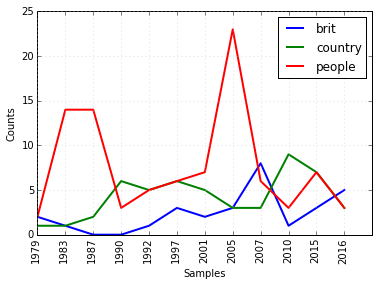

In [95]:
cfd = nltk.ConditionalFreqDist(
       (target, fileid[:4])
          for fileid in victorySpeeches.fileids()
          for w in victorySpeeches.words(fileid)
          for target in ['brit', 'people', "country"]
          if w.lower().startswith(target)) 
%matplotlib inline 
cfd.plot()

In [171]:
def nationalMarkers(speech):
    print("Matches for BRITISH")
    speech.concordance("british")
    print("")
    print("Matches for UNITED KINGDOM")
    speech.concordance("United Kingdom")
    print("")
    print("Matches for UK")
    speech.concordance("UK")
    print("")
    print("Matches for COUNTRY")
    speech.concordance("country") 
    print("")
    print("Matches for PEOPLE")
    speech.concordance("people") 

In [139]:
nationalMarkers(may2016)

Matches for BRITISH
No matches

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 3 of 3 matches:
. But the mission to make Britain a country that works for everyone means more 
 through an important moment in our country ’ s history . Following the referen
 world , and we will make Britain a country that works not for a privileged few

Matches for PEOPLE
Displaying 3 of 3 matches:
he budget deficit , and helped more people into work than ever before . But Da
 of same - sex marriage , to taking people on low wages out of income tax alto
ily , life is much harder than many people in Westminster realise . You have a


In [140]:
nationalMarkers(cameron2015)

Matches for BRITISH
No matches

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 7 of 7 matches:
e brink of something special in our country ; we can make Britain a place where
 , we must ensure that we bring our country together . As I said in the small h
s recovery reaches all parts of our country : from north to south , from east t
 ”. It means giving everyone in our country a chance , so no matter where you ’
When I stood here 5 years ago , our country was in the grip of an economic cris
as proved once again that this is a country with unrivalled skills and creative
ivalled skills and creativeness ; a country with such good humour , and such gr

Matches for PEOPLE
Displaying 7 of 7 matches:
 ideas and arguments , and a lot of people who believe profoundly in public se
anifesto is a manifesto for working people , and as a majority government we w
with childcare ; helping 30 million people cope with the cost of living by cut
g their tax

In [141]:
nationalMarkers(cameron2010)

Matches for BRITISH
No matches

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 9 of 9 matches:
. Compared with a decade ago , this country is more open at home and more compa
eful for and on behalf of the whole country I ' d like to pay tribute to the ou
vice . In terms of the future , our country has a hung parliament where no part
at is the right way to provide this country with the strong , the stable , the 
e into politics because I love this country . I think its best days still lie a
rvice . And I think the service our country needs right now is to face up to ou
erly , the frail the poorest in our country . We must take everyone through wit
rong and stable government that our country needs based on those values - rebui
 , rebuilding responsibility in our country . Those are the things I care about

Matches for PEOPLE
Displaying 3 of 3 matches:
 take difficult decisions , to lead people through those difficult decisions ,
t , and y

In [142]:
nationalMarkers(brown2007)

Matches for BRITISH
Displaying 5 of 5 matches:
 the service of what matters to the British people , meeting the concerns and a
istened and I have learned from the British people - and as Prime Minister I wi
ntinue to listen and learn from the British people - I have heard the need for 
 ; change to protect and extend the British way of life . And this need for cha
be overcome by the strengths of the British people . On this day I remember wor

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 3 of 3 matches:
d the great opportunity to serve my country . And at all times I will be strong
ncerns and aspirations of our whole country . I grew up in the town that I now 
ry . As I have travelled around the country and as I have listened and I have l

Matches for PEOPLE
Displaying 6 of 6 matches:
vice of what matters to the British people , meeting the concerns and aspirati
 and realise the talents of all our people then I am absolutely sure that

In [143]:
nationalMarkers(blair2005)

Matches for BRITISH
Displaying 3 of 3 matches:
 ' ve a very clear idea of what the British people now expect from this governm
ourth , I ' ve also learnt that the British people are a tolerant and decent pe
 ve also learnt something about the British people , that , whatever their diff

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 3 of 3 matches:
ny people and many families in this country . And they know that there are new 
ign by people ' s worry that in our country today , though they like the fact t
een a deeply divisive issue in this country - that ' s been very , very clear .

Matches for PEOPLE
Displaying 23 of 23 matches:
ng in our minds the priorities that people want , we - I - the government , ha
on is that you go out , you talk to people for week upon week and I ' ve liste
very clear idea of what the British people now expect from this government for
entlessly now on the priorities the people have set for us . And what are

In [144]:
nationalMarkers(blair2001)

Matches for BRITISH
Displaying 1 of 1 matches:
 victory in this election shows the British people understand we have laid foun

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 5 of 5 matches:
trusted with the government of this country and I am deeply conscious of that p
ches the changes that I believe the country needs to see . On the foundation of
 technology , knowing that for this country in the future the forces of global 
asy . But Britain is a very special country and its people are a very special p
lents take them , where we create a country genuinely where not just a few peop

Matches for PEOPLE
Displaying 7 of 7 matches:
t , of setting them out clearly for people and then focusing on them relentles
on me , after re - election to tell people very clearly what are the difficult
stem . Again here , from talking to people , from meeting them , from hearing 
n is a very special country and its people are a very special people and ou

In [145]:
nationalMarkers(blair1997)

Matches for BRITISH
Displaying 1 of 1 matches:
pon me and the great trust that the British people have placed in me . I know w

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 6 of 6 matches:
ministration and government for the country . John Major ' s dignity and courag
laced in me . I know well what this country has voted for today . It is a manda
our and I say to the people of this country -- we ran for office as New Labour 
ate to get those things done in our country that desperately need doing for the
o restore trust in politics in this country . That cleans it up , that decentra
 government , too , that gives this country strength and confidence in leadersh

Matches for PEOPLE
Displaying 6 of 6 matches:
nd the great trust that the British people have placed in me . I know well wha
ate for New Labour and I say to the people of this country -- we ran for offic
 govern in the interests of all our people -- the whole of this nation . T

In [146]:
nationalMarkers(major1992)

Matches for BRITISH
No matches

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 5 of 5 matches:
pportunities in front of us in this country . I want to make sure that this cou
try . I want to make sure that this country is in the right position to take ad
rst thing we must do is to move the country out of recession and back into grow
 quality of life for people in this country and they will be central to our pro
vailable for all the people in this country in precisely the way it has been in

Matches for PEOPLE
Displaying 5 of 5 matches:
ices that make such a difference to people ’ s lifestyle , such a difference t
 central to the quality of life for people in this country and they will be ce
ir lifetime can be handed on to the people they love and passed on between gen
independence that that provides for people . All these are going to be central
ealth Service available for all the people in this country in precisely the wa


In [147]:
nationalMarkers(major1990)

Matches for BRITISH
No matches

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 6 of 6 matches:
from so many people up and down the country . I hope in the next few years that
owering Prime Minister who left our country in a far better condition than she 
lding and development in which this country will play a full and leading role .
particular I want to see us build a country that is at ease with itself , a cou
try that is at ease with itself , a country that is confident , and a country t
a country that is confident , and a country that is prepared and willing to mak

Matches for PEOPLE
Displaying 3 of 3 matches:
at we have already had from so many people up and down the country . I hope in
n society , a society in which what people fulfil will depend upon their talen
ation and their good fortune . What people achieve should depend particularly 


In [148]:
nationalMarkers(thatcher1987)

Matches for BRITISH
No matches

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 2 of 2 matches:
dard of living throughout the whole country and the defence and , of course , a
 the prosperity everywhere over our country . I do not expect an enormous numbe

Matches for PEOPLE
Displaying 14 of 14 matches:
t ourselves to the judgement of the people . But we now have to get on and get
 but to try to bring opportunity to people who have not got it at the moment .
 [ fo 2 ] at some of the inner city people in housing and in education . Some 
sing and in education . Some of the people in some of those militant cities fe
 has gone into inner cities . Often people have not realised it is taxpayers '
it is taxpayers ' money because the people around those inner cities , or some
ty . We are producing the results , people realise that that is the right way 
 partnership between Government and people , Government having the right polic
nment having t

In [149]:
nationalMarkers(thatcher1983)

Matches for BRITISH
No matches

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 1 of 1 matches:
ecisive , strong Government in this country . We don ' t have to start afresh y

Matches for PEOPLE
Displaying 14 of 14 matches:
ow varied they have been . And some people are very disappointed . Well , yes 
o do , is that you have a number of people in the House for quite a time , you
e a time , you ' ve had a number of people in junior posts , you know people w
f people in junior posts , you know people who are ... climbing the ladder , w
at means ... having to ... for some people to come on the ladder , some people
people to come on the ladder , some people have to climb off . And it ' s not 
vement in politics in order to keep people with something to go for . No , I '
time to have a new look and I think people rather expect it — a new look , and
t perfectly clear — have a range of people in Cabinet you always , as I tried 
iews within the

In [150]:
nationalMarkers(thatcher1979)

Matches for BRITISH
Displaying 2 of 2 matches:
l the trust and confidence that the British people have placed in me and the th
pe ’ … .[ fo 1 ] … . and to all the British people — howsoever they voted — may

Matches for UNITED KINGDOM
No matches

Matches for UK
No matches

Matches for COUNTRY
Displaying 1 of 1 matches:
 strive to serve and strengthen the country of which we ' re so proud to be a p

Matches for PEOPLE
Displaying 2 of 2 matches:
ust and confidence that the British people have placed in me and the things in
[ fo 1 ] … . and to all the British people — howsoever they voted — may I say 


### 4.1.4 Expressions of gratitude

We also wanted to find if the winning candidates had made special mention of people or organisations. Again, we can get a general idea of the situation plotting relevant words (like *thank, grateful, gratitude*, etc.). We will use the `startswith()` method again, so that options like *thank*full, *greatful*ness, and other derived terms are also considered in the search. 

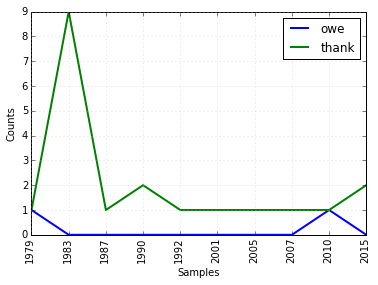

In [103]:
cfd = nltk.ConditionalFreqDist(
       (target, fileid[:4])
          for fileid in victorySpeeches.fileids()
          for w in victorySpeeches.words(fileid)
          for target in ["thank", "gratefull", "gratitude", "owe"]
          if w.lower().startswith(target)) 
cfd.plot()

In [151]:
def gratitudeMarkers(speech):
    print("Matches for THANK")
    speech.concordance("thank")
    print("")
    print("Matches for GRATEFUL")
    speech.concordance("grateful")
    print("")
    print("Matches for GRATITUDE")
    speech.concordance("gratitude")
    print("")
    print("Matches for OWE")
    speech.concordance("owe")     

In [152]:
gratitudeMarkers(may2016)

Matches for THANK
No matches

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [155]:
gratitudeMarkers(cameron2015)

Matches for THANK
Displaying 2 of 2 matches:
vernment in 70 years , and I want to thank all those who worked so hard to make
n make Great Britain greater still . Thank you .

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [156]:
gratitudeMarkers(cameron2010)

Matches for THANK
Displaying 1 of 1 matches:
nment will now start work on doing . Thank you very much .

Matches for GRATEFUL
Displaying 1 of 1 matches:
that is something we should all be grateful for and on behalf of the whole cou

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [159]:
gratitudeMarkers(brown2007)

Matches for THANK
Displaying 1 of 1 matches:
d now let the work of change begin . Thank you .

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [160]:
gratitudeMarkers(blair2005)

Matches for THANK
Displaying 1 of 1 matches:
ues our government will believe in . Thank you .

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [161]:
gratitudeMarkers(blair2001)

Matches for THANK
Displaying 1 of 1 matches:
now is the time to build upon them . Thank you .

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [162]:
gratitudeMarkers(blair1997)

Matches for THANK
No matches

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [165]:
gratitudeMarkers(major1992)

Matches for THANK
Displaying 1 of 1 matches:
 will use it well and not waste it . Thank you all very much !

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [166]:
gratitudeMarkers(major1990)

Matches for THANK
Displaying 1 of 1 matches:
ht away and make a start right now . Thank you very much indeed .

Matches for GRATEFUL
Displaying 2 of 2 matches:
                                   grateful for the trust that my Parliamentar
hat that trust is justified . I am grateful also for the enormous achievements

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [167]:
gratitudeMarkers(thatcher1987)

Matches for THANK
Displaying 1 of 1 matches:
e we were concentrating on content . Thank you very much . We have got a lot of

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [168]:
gratitudeMarkers(thatcher1983)

Matches for THANK
Displaying 9 of 9 matches:
 me . And finally I just want to say thank you to my husband , Denis , who has 
ectives are those in the manifesto , thank you ... Absolutely wonderful ! And g
t and we must exercise it that way . Thank you very much indeed , thank you , a
t way . Thank you very much indeed , thank you , all right , thank you very muc
uch indeed , thank you , all right , thank you very much . I must get back . I 
 ’ ve got a telephone call to make . Thank you , thank you very much , thank yo
telephone call to make . Thank you , thank you very much , thank you , thank yo
 . Thank you , thank you very much , thank you , thank you very much for coming
 , thank you very much , thank you , thank you very much for coming , goodbye .

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
No matches


In [169]:
gratitudeMarkers(thatcher1979)

Matches for THANK
Displaying 1 of 1 matches:
                                     Thank you very much . Very excited , very 

Matches for GRATEFUL
No matches

Matches for GRATITUDE
No matches

Matches for OWE
Displaying 1 of 1 matches:
important . Well , of course , I just owe almost everything to my own father . 


## Conclusions

Markers can be a particularly good idea to quickly analyse the contents of texts. In this case the topics of our interest and the terms used to identify them were very clear. It would be necessary to work with other topics to see if the method is equally effective.

Frequency distribution plots have the disadvantage of not keeping the chronological order of the files (speeches). Conditional frequency distribution plots did not show the same problem.

We also learned that it is important to check if the names of functions and concepts used in NLP programs mean exactly the same as the terms used by academics and theoreticians in the field.

The comparative perspective assumed for this work determined the need to find possible common parameters for comparison. A non-comparative analysis could be more propitious for a design that goes more in depth and can be better adapted to the particular characteristics of a speech/text.

### References

- Bird, Steven, Edward Loper and Ewan Klein (2009), *Natural Language Processing with Python*. O’Reilly Media Inc.

- NLTK 3.0 Documentation (2015), *Corpus readers*, available at http://www.nltk.org/howto/corpus.html#corpus-reader-classes

- Walker, Kaylin (2016) *Text mining South Park for characteristic phrases*. Available at https://github.com/walkerkq/textmining_southpark/blob/master/southpark_loglikelihood.pdf

- Walker, Kaylin (2016) *50 Years of Pop Music* Available at http://kaylinwalker.com/50-years-of-pop-music

- Kuchling, A.M. (2016), Regular Expression HOWTO, Available at https://docs.python.org/3/howto/regex.html

- Dalke, Andrew and Hettinger, Raymond (2014), Sorting Mini-HOW TO, Available at https://wiki.python.org/moin/HowTo/Sorting

- Python Software Foundation (2016), The Python Tutorial. Chapter 5: Data Structures, available at https://docs.python.org/3/tutorial/datastructures.html